DANS CE PROJET NOUS ALLONS ETUDIER LES DONNEES DE LA BANQUE MONDIALE. 

EN PARTICULIER LES DONNEES STATISTIQUES SUR L'EDUCATION. 


In [72]:
# COMMENCONS PAR IMPORTER LES LIBRAIRIES NECESSAIRES 
import numpy as np # POUR LE CALCUL MATRICIEL NOTAMMENT
import pandas as pd # POUR LES DATAFRAMES
import matplotlib.pyplot as plt # POUR LES REPRESENTATIONS GRAPHIQUES

import seaborn as sns # POUR CREER DES HEATMAP ET AUTRE

DANS LE DOSSIER A TELECHARGER SE TROUVENT 5 FICHIERS .CSV. NOUS ALLONS LES ETUDIER UN PAR UN

# ***<u> P1 - 1) ETUDE DU PREMIER FICHIER : EdStatsCountry</u>***

In [73]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv'

In [74]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country = pd.read_csv(path)

In [75]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [76]:
Fichier_Country.loc[(Fichier_Country['Short Name']=='Malta')]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
146,MLT,Malta,Malta,Republic of Malta,MT,Euro,A simple multiplier is used to convert the nat...,Middle East & North Africa,High income: nonOECD,MT,...,Special Data Dissemination Standard (SDDS),2011,NaN,NaN,Yes,2010,2008.0,2012.0,2002,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE

IL COMPORTE 32 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

LES DIFFERENTS NOMS (SHORT, TABLE, LONG)

LE PIB (HIGH, LOW ...)

DES DATES DE RECENSEMENT DE LA POPULATION ET DES PARCELLES AGRICOLES ET AUTRES


In [77]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

CE FICHIER CONTIENT  241 LIGNES NUMEROTEES DE 0 A 240 ET 32 COLONNES NUMEROTEES DE 0 A 31. IL COMPORTE 4 COLONNES DE TYPES FLOAT (NOMBRES DECIMAUX) ET 28 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 31 (Unnamed: 31) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. D'AUTRES COMME LA N°16 (Alternative conversion factor) OU ENCORE LA N°11 (National accounts reference year).... NE SONT QUE PEU REMPLIES. D'AUTRES COMME LA N°5 (Currency Unit) SONT QUASIMENT COMPLETES. ENFIN DES COLONNES TELLES QUE LA N°1 (Short Name) sont complétes. 

In [78]:
Fichier_Country['Vital registration complete'].unique()

array(['Yes', nan, 'Yes. Vital registration for Guernsey and Jersey.'],
      dtype=object)

In [79]:
# DANS UN PREMIER TEMPS ON NE VA CONSERVER QUE LES PAYS QUI ONT UN RENSEIGNEMENT DIF DE NAN DANS LA COLONNE VITAL REGISTRATION COMPLETE
# CETTE COLONNE INDIQUANT LA QUALITE DES DEMARCHES EFFECTUEES A L'ETAT CIVIL (NAISSANCE,DECES, MARIAGE ...)
# CE CHOIX ME SEMBLE PERTINENT AFIN DE DISPOSER ENSUITE DE VALEURS CORRECTES
Fichier_Country=Fichier_Country.loc[(Fichier_Country['Vital registration complete']=='Yes. Vital registration for Guernsey and Jersey.') | (Fichier_Country['Vital registration complete']=='Yes')]

In [80]:
# ON VA DROP TOUTES LES COLONNES QUI ONT PLUS DE 30% DE NAN

Liste_à_drop = []
for features in Fichier_Country.columns:
    if Fichier_Country[features].isnull().sum()>0.3*Fichier_Country.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Country=Fichier_Country.drop(Liste_à_drop,axis=1)
Fichier_Country.info()

['Special Notes', 'National accounts reference year', 'Lending category', 'Other groups', 'Alternative conversion factor', 'PPP survey year', 'External debt Reporting status', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Latest agricultural census', 'Latest industrial data', 'Unnamed: 31']
<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 232
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       111 non-null    object 
 1   Short Name                         111 non-null    object 
 2   Table Name                         111 non-null    object 
 3   Long Name                          111 non-null    object 
 4   2-alpha code                       110 non-null    object 
 5   Currency Unit                      111 non-null    object 
 6   Region                             111 non-null    objec

# ***<u> P1 - 2) PASSONS AU PROCHAIN FICHIER NOMME EdStatsCountry-Series</u>***


In [81]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv'

In [82]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country_Series = pd.read_csv(path)

In [83]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country_Series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE

IL COMPORTE 4 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

UNE COLONNE NOMMEE SeriesCode EN LIEN CERTAINEMENT AVEFC LE FICHIER EdStatsSeries

UNE COLONNE DESCRIPTION INDIQUANT LA SOURCE DES INFOS. ON CONSTATE QUE LES SOURCES VARIENT. CERTAINES OFFICIELLES COMME L'ONU. D'AUTRES OBTENUES PAR REGRESSION

UNE COLONNE Unnamed: 3 CERTAINEMENT ENTIEREMENT VIDE COMME SUR LE FICHIER PRECEDENT

In [84]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CE FICHIER CONTIENT  ***613 LIGNES*** NUMEROTEES DE 0 A 612 ET ***4 COLONNES*** NUMEROTEES DE 0 A 3. IL COMPORTE *****1 COLONNE DE TYPES FLOAT***** (NOMBRES DECIMAUX) ET ***3 DE TYPE OBJECT*** (CHAINE DE CARACTERES).

ON CONSTATE QUE LA COLONNE N° 3 (Unnamed: 3) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. QUANT AU RESTE DES COLONNES ELLES SONT COMPLETES. 

In [85]:
# ON VA DROP Unnamed: 3

Fichier_Country_Series=Fichier_Country_Series.drop(['Unnamed: 3'],axis=1)



# ***<u> P1 - 3) PASSONS AU PROCHAIN FICHIER NOMME EdStatsData</u>***



In [86]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv'

In [87]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Data = pd.read_csv(path)

In [88]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY NAME, CEPENDANT ICI IL SEMBLE PLUTOT S'AGIR DE GROUPE GEOGRAPHIQUE COMME Arab World (Monde Arabe) OU ENCORE East Asia & Pacific (Espace Asie Pacifique). IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

IL COMPORTE 70 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

DEUX COLONNES NOMMEES Country Name ET Country Code QUI REPRESENTENT EN FAIT LES CODE DE REGIONS GEOGRAPHIOQUES AINSI QUE LEUR VERSIONS ABREGEES (EX : Arab World -> ARB)

DEUX COLONNES NOMMEES Indicator Name ET Indicator Code QUI SONT L'INDICATEUR ETUDIE AINSI QUE SON ABREVIATION (EX : Adujstment... -> UIS.NERA.2)

LA DERNIERE NOMMEE Unnamed: 69 CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT

QUANT AUX 65 COLONNES RESTANTES ELLES REPRESENTENT TOUTES UNE ANNE DIFFERENTES CONTENANT LES VALEURS CONNUES POUR L'INDICATEUR PRECISE DANS LA COLONNE Indicator Name A LA DATE INDIQUEE PAR LA COLONNE. LES ANNEES AVANCENT D'UN PAS DE 1 DE 1970 A 2017 INCLUS PUIS AVANCENT D'UN PAS DE 5 DE 2020 A 2100 INCLUS.




In [89]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      


CE FICHIER CONTIENT  886930 LIGNES NUMEROTEES DE 0 A 886929 ET 70 COLONNES NUMEROTEES DE 0 A 69. IL COMPORTE 66 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 



ON CONSTATE QUE LA COLONNE N° 69 (Unnamed: 69) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. LA COLONNE N°51 REPRESENTANT L'ANNEE 2017 EST TRES PEU RENSEIGNEE (SEULEMENT 143 NON-NULL).LES ANNEES TERMINANT PAR 0 OU 5 ENTRE 1970 ET 1990 INCLUS SONT MIEUX RENSEIGNEES QUE LES AUTRES SUR LA MEME PERIODE. CE PHENOMENE CE REPETE DE 1990 A 2000 BIEN QUE SUR CETTE PERIODE LES "FAIBLES" RENSEIGNEMENTS ONT OTUT DE MEME DOUBLES EN VALEUR ABSOLUE. A PARTIR DES ANNEES 1999-2000 JUSQU'EN 2015 LES RENSEIGNEMENTS VONT DE 120K A 200K VOIR 240K. 2016 ET 2017 ETANT TRES MAL RENSEIGNEES LES COLONNES N°52 JUSQU'A 68 c.à.d. DE L'ANNEE 2020 JUSQU'A L'ANNEE 2100 COMPORTE TOUTES 51436 VALEURS NON NULLES (CERTAINEMENT DES PROJECTIONS DE VALEURS)


In [90]:
list(Fichier_Data['Indicator Name'].unique())

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [91]:
list(Fichier_Data['Indicator Code'].unique())

['UIS.NERA.2',
 'UIS.NERA.2.F',
 'UIS.NERA.2.GPI',
 'UIS.NERA.2.M',
 'SE.PRM.TENR',
 'SE.PRM.TENR.FE',
 'UIS.NERA.1.GPI',
 'SE.PRM.TENR.MA',
 'UIS.NERA.3',
 'UIS.NERA.3.F',
 'UIS.NERA.3.GPI',
 'UIS.NERA.3.M',
 'UIS.NIRA.1',
 'UIS.NIRA.1.F',
 'UIS.NIRA.1.GPI',
 'UIS.NIRA.1.M',
 'UIS.LPP.AG15T99',
 'UIS.LP.AG15T99',
 'UIS.LP.AG15T99.F',
 'UIS.LP.AG15T99.M',
 'SE.ADT.LITR.ZS',
 'SE.ADT.LITR.FE.ZS',
 'UIS.LR.AG15T99.GPI',
 'SE.ADT.LITR.MA.ZS',
 'UIS.AFR.AGRADMG.1.PU',
 'UIS.AFR.PBR.1.G1.PU.MATH',
 'UIS.AFR.PBR.1.G2.PU.MATH',
 'UIS.AFR.PBR.1.G3.PU.MATH',
 'UIS.AFR.PBR.1.G4.PU.MATH',
 'UIS.AFR.PBR.1.G5.PU.MATH',
 'UIS.AFR.PBR.1.G6.PU.MATH',
 'UIS.AFR.PBR.1.G7.PU.MATH',
 'UIS.AFR.PBR.1.PU.MATH',
 'UIS.AFR.PBR.1.G1.PU.READ',
 'UIS.AFR.PBR.1.G2.PU.READ',
 'UIS.AFR.PBR.1.G3.PU.READ',
 'UIS.AFR.PBR.1.G4.PU.READ',
 'UIS.AFR.PBR.1.G5.PU.READ',
 'UIS.AFR.PBR.1.G6.PU.READ',
 'UIS.AFR.PBR.1.G7.PU.READ',
 'UIS.AFR.PBR.1.PU.READ',
 'UIS.AFR.CS.1.PU',
 'UIS.AFR.CS.MG.1.PU',
 'UIS.AFR.CS.SG.1.G1.PU',
 'UI

In [92]:
Fichier_Data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


ON CONSTATE QUE DANS CETTE TABLE LE COUNTRY CODE DESIGNE DES PAYS MAIS AUSSI DES ZONES REGIONALES (COMME ASIE DE L'EST ET PACIFIQUE (AVEC LES LOW INCOME INCLUS OU NON), PAYS DE L'OCDE, ZONE EURO...) VOIR LA TOTALITE DU MONDE.


In [93]:
# ON VA DROP TOUTES LES COLONNES QUI N'ONT PAS AU MOINS 5% DE NON NULL

Liste_à_drop = []
for features in Fichier_Data.columns:
    if Fichier_Data[features].isnull().sum()>0.95*Fichier_Data.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Data=Fichier_Data.drop(Liste_à_drop,axis=1)
Fichier_Data.info()

['1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '2016', '2017', 'Unnamed: 69']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1975            87306 non-null   float64
 6   1980            89122 non-null   float64
 7   1985            90296 non-null   float64
 8   1990            124405 non-null  float64
 9   1991            74437 non-null   float64
 10  1992            75543 non-null   float64
 11  1993            75793 non-null   float64
 12  1994            77462 non-null   float64
 13  1995            131361 non-null  f

In [94]:
# ON VA MAINTENANT DROP LES LIGNES TROP PEU RENSEIGNEES 
# J'AI CHOISI UNE LIMITE A AU MOINS 22 NON NULL DANS LA LIGNE AFIN D'INCLURE LES LIGNES QUI ONT AU MOINS UNE DONNEE SUPPLEMENTAIRE
# QUE LES 4 PREMIERES(QUI NE MANQUENT NULLE PART) ET LES 17 DERNIERES QUI SONT DES PROJECTIONS
Fichier_Data=Fichier_Data.dropna(thresh=22)
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127594 entries, 4 to 886921
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    127594 non-null  object 
 1   Country Code    127594 non-null  object 
 2   Indicator Name  127594 non-null  object 
 3   Indicator Code  127594 non-null  object 
 4   1970            17424 non-null   float64
 5   1975            26745 non-null   float64
 6   1980            27763 non-null   float64
 7   1985            29474 non-null   float64
 8   1990            64454 non-null   float64
 9   1991            66081 non-null   float64
 10  1992            67030 non-null   float64
 11  1993            67634 non-null   float64
 12  1994            68868 non-null   float64
 13  1995            68729 non-null   float64
 14  1996            68617 non-null   float64
 15  1997            66312 non-null   float64
 16  1998            65847 non-null   float64
 17  1999           

In [95]:
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,59.365540,65.617767,69.033211,71.995819,72.602837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,48.363892,56.486790,61.520870,65.827492,66.797028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.691760,0.759440,0.806770,0.844660,0.854320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,69.914551,74.379982,76.255493,77.933853,78.187492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,54.865627,62.559566,64.613091,67.080444,67.508705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ***<u> P1 - 4) PASSONS AU PROCHAIN FICHIER NOMME EdStatsFootNote</u>***

In [96]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv'

In [97]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_FootNote = pd.read_csv(path)

In [98]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE COUNTRY CODE, ABW POUR ARUBA COMME ON A PU LE VOIR DANS LE 1ER FICHIER. IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

IL COMPORTE 5 COLONNES COMME LE COUNTRY CODE QUI SERT D'IDENTIFIANT

UNE COLONNE CountryCode REFERENCANT LA ZONE GEOGRAPHIQUE

UNE COLONNE NOMMEE SeriesCode REFERENCANT LE CODE DE LA SERIE DE DONNEES

UNE COLONNE Year RENSEIGNANT L'ANNEE A LAQUELLE SE RAPPORTE LA SERIE

UNE COLONNE DESCRIPTION EXPLIQUANT SI LA DONNEE EST UNE ESTIMATION OU UNE DONNEE COLLECTEE

LA DERNIERE NOMMEE Unnamed: 4 CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT


In [99]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_FootNote.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB



CE FICHIER CONTIENT  643638 LIGNES NUMEROTEES DE 0 A 643637 ET 5 COLONNES NUMEROTEES DE 0 A 4. IL COMPORTE 1 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 4 (Unnamed: 4) EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. QUANT AUX AUTRES COLONNE ELLES SONT TOUTES COMPLETES


In [100]:
# ON VA DROP la colonne Unnamed: 4

Fichier_FootNote=Fichier_FootNote.drop(['Unnamed: 4'],axis=1)

# ***<u> P1 - 5) PASSONS AU PROCHAIN FICHIER NOMME EdStatsSeries</u>***

In [101]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv'

In [102]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Series = pd.read_csv(path)

In [103]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE Series Code, IL SEMBLERAIT QUE DANS LE NOM SE TROUVE LA TRNACHE D'AGE ETUDIE PAR EXEMPLE 1519 POUR LES 15-19 ANS. IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

L'ENSEMBLE DES COLONNES A POUR BUT DE RENSEIGNER LA MANIERE DONT ONT ETE COLLECTEES LES DONNEES, LES SOURCES UTILISEES, LES UNITES DE MESURES...

In [104]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    


CE FICHIER CONTIENT  3665 LIGNES NUMEROTEES DE 0 A 3664 ET 21 COLONNES NUMEROTEES DE 0 A 20. IL COMPORTE 6 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 15 DE TYPE OBJECT (CHAINE DE CARACTERES). 
A NOTER QUE TOUTES LES COLONNES DE TYPES FLOAT SONT ENTIEREMENT VIDES


LES COLONNES N° 0, 1, 2, 4, 13 SONT COMPLETES. LA COLONNE N°3 Short Definition EST QUANT A ELLE COMPLETES A ENVIRON 60%. QUANT AUX AUTRES ELLES NE DEPASSENT PAS LES 552 RENSEIGNEMENTS (ENVIRON 15%). ENFIN LES N° 5, 11, 17, 18, 19, 20 SONT ENTIEREMENT VIDES

In [105]:
# ON VA DROP TOUTES LES COLONNES QUI N'ONT PAS AU MOINS 70% DE NON NULL

Liste_à_drop = []
for features in Fichier_Series.columns:
    if Fichier_Series[features].isnull().sum()>0.3*Fichier_Series.shape[0]:
        Liste_à_drop.append(features)
print(Liste_à_drop)
Fichier_Series=Fichier_Series.drop(Liste_à_drop,axis=1)
Fichier_Series.info()

['Short definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      3665 non-null   object
 1   Topic            3665 non-null   object
 2   Indicator Name   3665 non-null   object
 3   Long definition  3665 non-null   object
 4   Source           3665 non-null   object
dtypes: object(5)
memory usage: 143.3+ KB


Her we deleted 23.5 % of all our columns, which represente 12 columns

# ***<u> P1 - 6) FIN ETUDE PRELIMINAIRE</u>***

# ***<u> P2 - 1) SUITE DE L'ETUDE</u>***

REPRISE DE L'ANALYSE

LE FICHIER "Fichier_Series" NE SEMBLE PAS PERTINENT POUR L'ANALYSE (IL DETAILLE EN FAIT LA METHODOLOGIE APPLIQUEE POUR RECUEUILLIR L'ENSEMBLE DES DONNEES)

DE MEME POUR "Fichier_Footnote" AINSI QUE "Fichier_Country_Series" QUI LA AUSSI SONT DES FICHIERS DE METHODOLOGIE.

NOUS ALLONS REGROUPER LES INFORMATIONS FOURNIES DANS LE DATAFRAME "Fichier_Data" DES ANNEES 2011 A 2015 AFIN D'AVOIR DES DONNEES EXPLOITABLES

In [106]:
# AGREGATION DES VALEURS DE 2011 A 2015
Fichier_Data['Periode 2011-2015']=Fichier_Data[['2011', '2012', '2013', '2014', '2015']].sum(axis=1)
Fichier_Data.tail()

# ffill ou bfill for missing values

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1975,1980,1985,1990,1991,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Periode 2011-2015
886917,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,212.14,179.40,150.11,126.43,106.82,91.70,78.21,67.56,59.06,721.56
886918,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17,1474.43
886919,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,3469.66,3493.32,3491.72,3468.64,3429.54,3378.61,3317.67,3248.91,3175.64,1722.96
886920,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,3106.84,3078.78,3041.50,3000.74,2961.23,2924.73,2889.02,2851.65,2813.31,1873.55
886921,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,6576.50,6572.10,6533.22,6469.39,6390.77,6303.34,6206.69,6100.56,5988.95,3596.51


In [107]:
# ON VA MAINTENANT CREER UN DATAFRAME DONT LES COLONNES SERONT "COUNTRY CODE"
# AINSI QUE CHAQUE INDICATOR Name PRESENTS DANS LA COLONNE "INDICATOR NAME" ACTUELLE.
# POUR LES VALEURS DE CES COLONNES NOUS UTILISERONS LES VALEURS "PERIODE 2011-2015"

DF_pivot=Fichier_Data.pivot(index='Country Code',columns='Indicator Name',values='Periode 2011-2015')
DF_pivot=DF_pivot.reset_index()

DF_pivot


Indicator Name,Country Code,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.01,12.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,513.24,1030.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5880.03,11703.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.733849,...,634.93,953.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ON A MAINTENANT UN DF CONTENANT 241 LIGNES (UNE PAR COUNTRY CODE) ET 1049 COLONNES (DIVERS INDICATEURS)

VERIFIONS QUE LES DONNEES SONT AU BON ENDROIT

In [108]:
Fichier_Data.loc[(Fichier_Data['Indicator Name']=='Adjusted net intake rate to Grade 1 of primary education, both sexes (%)') 
                  & (Fichier_Data['Country Code']=='ZMB'),'Periode 2011-2015']

879612    184.733849
Name: Periode 2011-2015, dtype: float64

In [109]:
DF_pivot.loc[DF_pivot['Country Code']=='ZMB','Adjusted net intake rate to Grade 1 of primary education, both sexes (%)']

239    184.733849
Name: Adjusted net intake rate to Grade 1 of primary education, both sexes (%), dtype: float64

ON RETROUVE LES MEMES VALEURS PARFAIT

In [110]:

# CALCULER LE POURCENTAGE DE NAN POUR CHAQUE COLONNES
POURCENTAGE_NAN = DF_pivot.isnull().mean() * 100


ICI DF_PIVOT.ISNULL() EST UN DATA FRAME DE MEME TAILLE QUE DF_PIVOT COMPOSE DE BOOLEENS TRUE SI LA VALEUR EST NAN FALSE SINON

ENSUITE .MEAN() CALCULE LA MOYENNE PAR COLONNE (1 POUR TRUE ET 0 POUR FALSE)

EN MULTIPLIANT CETTE MOYENNE PAR 100 ON OBTIENT LE POURCENTAGE DE NAN PRESENTS DANS CHAQUE COLONNE

In [111]:

# DEFINITION DE LA LIMITE DE NAN ACCEPTABLE
limite = 30


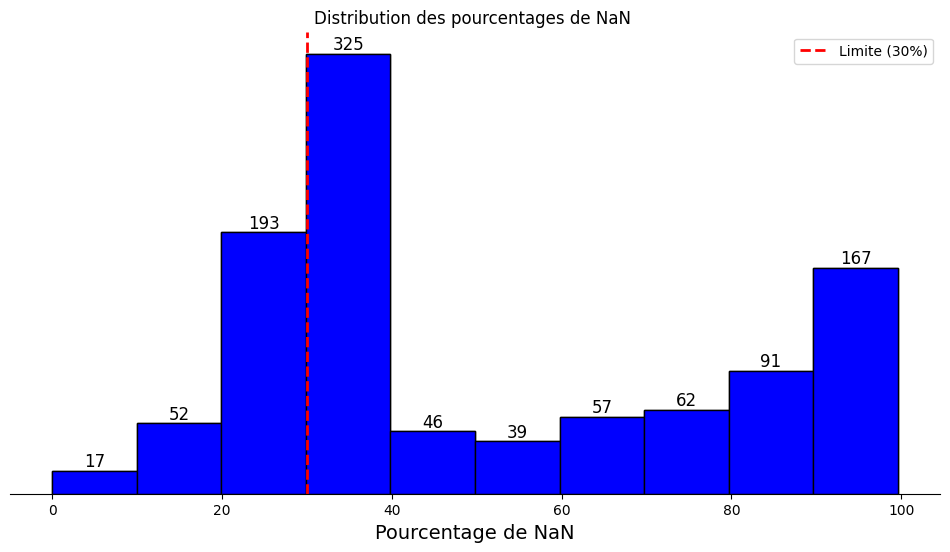

In [112]:
# VISUALISATION AVEC UN HISTOGRAMME
plt.figure(figsize=(12, 6))
plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')

plt.axvline(limite, color='r', linestyle='--', linewidth=2, label=f'Limite ({limite}%)')
plt.title("Distribution des pourcentages de NaN ")
plt.xlabel("Pourcentage de NaN",fontsize=14)


plt.legend()

ax=plt.gca() # commande permettant de créer un objet ax pour modifier les axes

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

patches=plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')[2] # collection des barres retournée par plt.hist

ax.bar_label(patches, label_type='edge', fontsize=12)

ax.yaxis.set_visible(False)
plt.show()



In [113]:
# NOUS ALLONS MAINTENANT DROP LES COLONNES CONTENANT PLUS DE 30% DE NAN

Liste_à_drop=[]
for features in DF_pivot.columns:
    if DF_pivot[features].isnull().sum()>0.3*DF_pivot.shape[0] and features not in ['Enrolment in secondary education, both sexes (number)',
 'Enrolment in secondary vocational, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Net enrolment rate, secondary, gender parity index (GPI)']:
        Liste_à_drop.append(features)
Nbre_index_drop=len(Liste_à_drop)
print(f"On va retirer {Nbre_index_drop} indicateurs")
DF_pivot=DF_pivot.drop(Liste_à_drop,axis=1)
DF_pivot.info()

On va retirer 783 indicateurs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Columns: 266 entries, Country Code to Unemployment, total (% of total labor force)
dtypes: float64(265), object(1)
memory usage: 501.0+ KB


In [114]:
DF_pivot

Indicator Name,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.584464e+09,...,NaN,NaN,10.0,10.0,30.0,25.0,15.0,NaN,NaN,NaN
1,AFG,29596886.0,11887343.0,12464817.0,12341788.0,4298870.0,123029.0,NaN,NaN,9.777887e+10,...,21.56246,30.27947,15.0,14.0,30.0,30.0,15.0,63.200000,37.500000,41.800000
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.768912e+11,5.741655e+11,...,NaN,NaN,15.0,5.0,30.0,30.0,15.0,33.700000,28.900001,30.999999
3,ALB,1005265.0,474986.0,1699162.0,1583049.0,772406.0,116113.0,803091.0,6.295122e+10,6.255044e+10,...,20.75275,21.28889,20.0,15.0,25.0,35.0,15.0,72.300000,81.200000,77.600000
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.599646e+10,1.605049e+10,...,NaN,NaN,20.0,15.0,30.0,30.0,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.332350e+11,1.894973e+11,...,NaN,NaN,15.0,15.0,30.0,30.0,15.0,195.700001,48.700001,86.600000
238,ZAF,28220946.0,13694903.0,14820886.0,13989809.0,7233632.0,831077.0,NaN,2.021189e+12,1.848751e+12,...,27.16209,27.74080,10.0,5.0,35.0,25.0,15.0,135.800001,114.400000,124.000002
239,ZMB,9240723.0,4605380.0,NaN,2182525.0,1018080.0,NaN,NaN,1.199721e+11,1.253140e+11,...,23.21163,23.30722,10.0,20.0,35.0,25.0,15.0,46.400000,42.700000,44.600000


ON CONSTATE QUE CERTAINS PAYS ONT ENCORE UN GRAND NOMBRE DE RENSEIGNEMENTS MANQUANTS

VERIFIONS CA


In [115]:
# Calculer le pourcentage de NaN pour chaque pays
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)
POURCENTAGE_NAN_LIGNE

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\1899575270.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)


Country Code
MAF    98.872180
MNP    98.872180
XKX    98.872180
CUW    98.120301
ASM    98.120301
         ...    
MLT     0.000000
KOR     0.000000
LAO     0.000000
LSO     0.000000
SWE     0.000000
Length: 241, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\3753837851.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


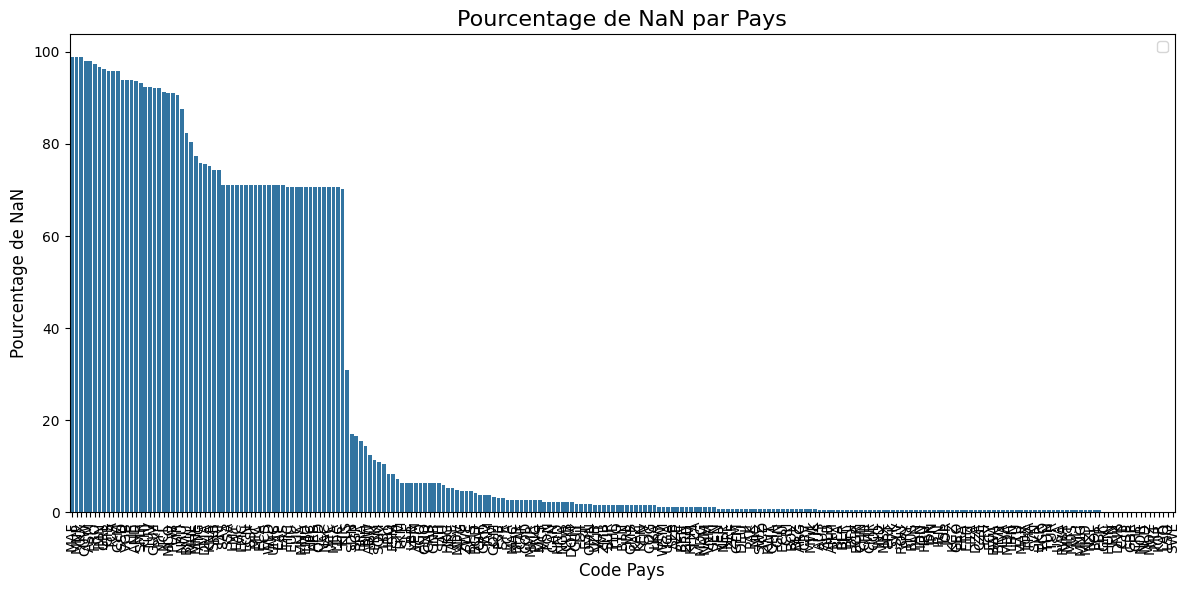

In [116]:

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(12, 6))

# Créer le diagramme en barres
sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)



# Personnaliser le graphique
ax.set_title('Pourcentage de NaN par Pays', fontsize=16)
ax.set_xlabel('Code Pays', fontsize=12)
ax.set_ylabel('Pourcentage de NaN', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe x

# Ajouter une légende
ax.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\1341931932.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\1341931932.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


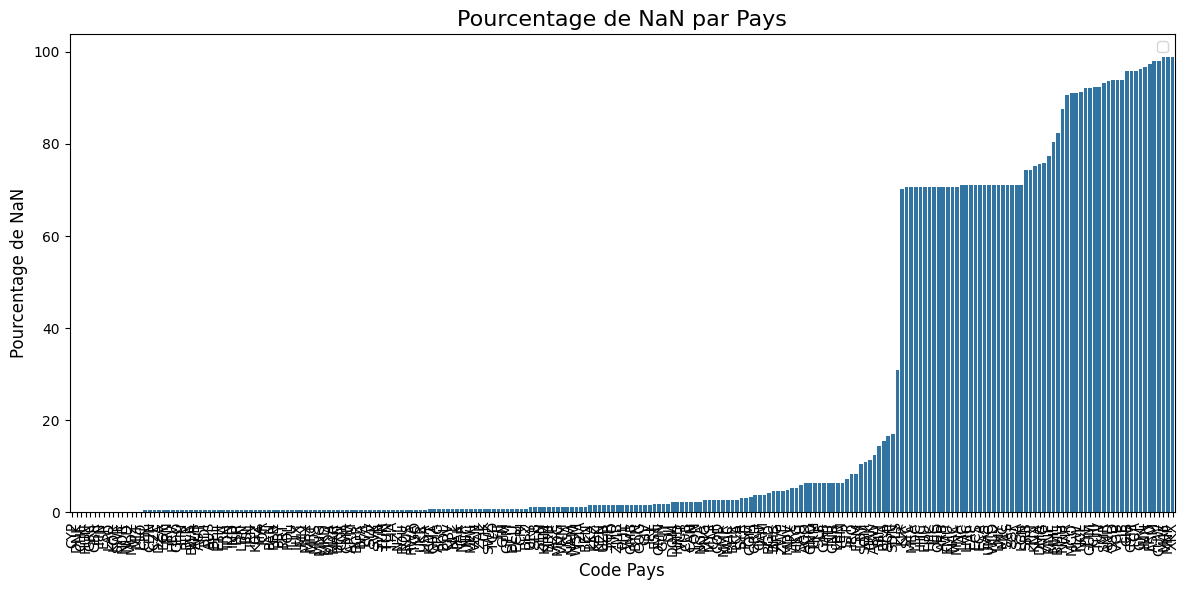

In [117]:
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values()
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(12, 6))

# Créer le diagramme en barres
sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)



# Personnaliser le graphique
ax.set_title('Pourcentage de NaN par Pays', fontsize=16)
ax.set_xlabel('Code Pays', fontsize=12)
ax.set_ylabel('Pourcentage de NaN', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe x

# Ajouter une légende
ax.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

ON PEUT VOIR SUR CE GRAPHIQUE QU'UNE PARTIE DES PAYS SEMBLENT N'AVOIR AUCUNE INFO MANQUANTES. NOUS ALLONS NOUS CONCENTRER SUR CES DERNIERS

In [118]:
# Calculer le pourcentage de NaN pour chaque pays
POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


# Compter le nombre de pays complets
pays_complet = np.sum(POURCENTAGE_NAN_LIGNE <= 1)


print(f"Nombre de pays complet: {pays_complet}")


Nombre de pays complet: 100


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\1829132089.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


IL Y A DONC 122 PAYS COMPLETS. NOUS ALLONS LES CONSERVER ET ELIMINER LES AUTRES

In [119]:
# DROP DES LIGNES AVEC AU MOINS UN NAN
DF_pivot=DF_pivot.dropna(axis=0,how='any')



In [120]:
DF_pivot

Indicator Name,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
34,CHE,2428964.0,1178653.00,3058759.0,1950024.0,998439.0,1108735.000,1391121.00,3.063123e+12,3.444599e+12,...,24.804790,24.835620,15.0,10.0,30.0,35.0,20.0,22.700000,20.800000,21.600000
49,CYP,269614.0,130997.00,301283.0,279239.0,143430.0,22044.000,166695.00,1.204589e+11,1.195886e+11,...,23.981800,23.964890,15.0,15.0,30.0,30.0,15.0,62.799999,69.500001,66.600000
54,DNK,2347106.0,1140830.00,2709298.0,2030190.0,1034173.0,679108.000,1440243.00,1.659692e+12,1.669029e+12,...,28.193430,28.447220,15.0,15.0,35.0,30.0,15.0,35.500000,34.300000,34.900000
65,ESP,14495171.0,7055566.00,16442057.0,13563380.0,6701410.0,2878677.000,9831810.00,6.934588e+12,6.760641e+12,...,25.054440,25.092610,17.0,15.0,30.0,30.0,13.0,122.500000,115.600000,118.799999
69,FIN,1748289.0,851962.00,2456390.0,1426500.0,737910.0,1029890.000,1534827.00,1.247491e+12,1.305409e+12,...,24.064800,24.170630,15.0,20.0,30.0,30.0,15.0,38.200000,44.800000,41.799999
75,GBR,18302649.0,8929155.25,22903571.5,17813368.5,8791882.5,5090203.375,9727194.75,1.290336e+13,1.393000e+13,...,25.747580,25.809650,15.0,10.0,30.0,35.0,20.0,32.600000,36.700001,34.800000
83,GRC,2536020.0,1230326.00,2747910.0,2270442.0,1137215.0,477468.000,2661152.00,1.259050e+12,1.205902e+12,...,17.701930,17.964490,15.0,13.0,30.0,30.0,15.0,140.200001,106.800000,121.199999
95,HUN,1945827.0,942529.00,4322192.0,3683651.0,1847536.0,638541.000,1758908.00,6.809652e+11,6.668516e+11,...,16.010740,16.191531,20.0,20.0,20.0,40.0,20.0,46.700000,46.800000,46.700000
114,KOR,14347694.0,6882194.00,18367233.0,16586101.0,7954123.0,1781132.000,16644420.00,5.993155e+12,6.524974e+12,...,17.977640,18.146440,15.0,15.0,30.0,30.0,15.0,15.600000,17.700000,16.800000
117,LAO,4383703.0,2092036.00,2796133.0,2765413.0,1280583.0,30720.000,651355.00,4.505034e+10,5.805373e+10,...,23.085180,24.462360,20.0,15.0,25.0,35.0,15.0,5.600000,7.500000,6.500000


In [121]:
DF_pivot=DF_pivot.reset_index()
DF_pivot

Indicator Name,index,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP at market prices (constant 2005 US$),...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
0,34,CHE,2428964.0,1178653.00,3058759.0,1950024.0,998439.0,1108735.000,1391121.00,3.063123e+12,...,24.804790,24.835620,15.0,10.0,30.0,35.0,20.0,22.700000,20.800000,21.600000
1,49,CYP,269614.0,130997.00,301283.0,279239.0,143430.0,22044.000,166695.00,1.204589e+11,...,23.981800,23.964890,15.0,15.0,30.0,30.0,15.0,62.799999,69.500001,66.600000
2,54,DNK,2347106.0,1140830.00,2709298.0,2030190.0,1034173.0,679108.000,1440243.00,1.659692e+12,...,28.193430,28.447220,15.0,15.0,35.0,30.0,15.0,35.500000,34.300000,34.900000
3,65,ESP,14495171.0,7055566.00,16442057.0,13563380.0,6701410.0,2878677.000,9831810.00,6.934588e+12,...,25.054440,25.092610,17.0,15.0,30.0,30.0,13.0,122.500000,115.600000,118.799999
4,69,FIN,1748289.0,851962.00,2456390.0,1426500.0,737910.0,1029890.000,1534827.00,1.247491e+12,...,24.064800,24.170630,15.0,20.0,30.0,30.0,15.0,38.200000,44.800000,41.799999
5,75,GBR,18302649.0,8929155.25,22903571.5,17813368.5,8791882.5,5090203.375,9727194.75,1.290336e+13,...,25.747580,25.809650,15.0,10.0,30.0,35.0,20.0,32.600000,36.700001,34.800000
6,83,GRC,2536020.0,1230326.00,2747910.0,2270442.0,1137215.0,477468.000,2661152.00,1.259050e+12,...,17.701930,17.964490,15.0,13.0,30.0,30.0,15.0,140.200001,106.800000,121.199999
7,95,HUN,1945827.0,942529.00,4322192.0,3683651.0,1847536.0,638541.000,1758908.00,6.809652e+11,...,16.010740,16.191531,20.0,20.0,20.0,40.0,20.0,46.700000,46.800000,46.700000
8,114,KOR,14347694.0,6882194.00,18367233.0,16586101.0,7954123.0,1781132.000,16644420.00,5.993155e+12,...,17.977640,18.146440,15.0,15.0,30.0,30.0,15.0,15.600000,17.700000,16.800000
9,117,LAO,4383703.0,2092036.00,2796133.0,2765413.0,1280583.0,30720.000,651355.00,4.505034e+10,...,23.085180,24.462360,20.0,15.0,25.0,35.0,15.0,5.600000,7.500000,6.500000


In [122]:
DF_pivot=DF_pivot.drop(['index'], axis=1)
DF_pivot

Indicator Name,Country Code,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)","Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary general, female (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),...,"School life expectancy, primary, female (years)","School life expectancy, primary, male (years)",Theoretical duration of lower secondary education (years),Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)"
0,CHE,2428964.0,1178653.00,3058759.0,1950024.0,998439.0,1108735.000,1391121.00,3.063123e+12,3.444599e+12,...,24.804790,24.835620,15.0,10.0,30.0,35.0,20.0,22.700000,20.800000,21.600000
1,CYP,269614.0,130997.00,301283.0,279239.0,143430.0,22044.000,166695.00,1.204589e+11,1.195886e+11,...,23.981800,23.964890,15.0,15.0,30.0,30.0,15.0,62.799999,69.500001,66.600000
2,DNK,2347106.0,1140830.00,2709298.0,2030190.0,1034173.0,679108.000,1440243.00,1.659692e+12,1.669029e+12,...,28.193430,28.447220,15.0,15.0,35.0,30.0,15.0,35.500000,34.300000,34.900000
3,ESP,14495171.0,7055566.00,16442057.0,13563380.0,6701410.0,2878677.000,9831810.00,6.934588e+12,6.760641e+12,...,25.054440,25.092610,17.0,15.0,30.0,30.0,13.0,122.500000,115.600000,118.799999
4,FIN,1748289.0,851962.00,2456390.0,1426500.0,737910.0,1029890.000,1534827.00,1.247491e+12,1.305409e+12,...,24.064800,24.170630,15.0,20.0,30.0,30.0,15.0,38.200000,44.800000,41.799999
5,GBR,18302649.0,8929155.25,22903571.5,17813368.5,8791882.5,5090203.375,9727194.75,1.290336e+13,1.393000e+13,...,25.747580,25.809650,15.0,10.0,30.0,35.0,20.0,32.600000,36.700001,34.800000
6,GRC,2536020.0,1230326.00,2747910.0,2270442.0,1137215.0,477468.000,2661152.00,1.259050e+12,1.205902e+12,...,17.701930,17.964490,15.0,13.0,30.0,30.0,15.0,140.200001,106.800000,121.199999
7,HUN,1945827.0,942529.00,4322192.0,3683651.0,1847536.0,638541.000,1758908.00,6.809652e+11,6.668516e+11,...,16.010740,16.191531,20.0,20.0,20.0,40.0,20.0,46.700000,46.800000,46.700000
8,KOR,14347694.0,6882194.00,18367233.0,16586101.0,7954123.0,1781132.000,16644420.00,5.993155e+12,6.524974e+12,...,17.977640,18.146440,15.0,15.0,30.0,30.0,15.0,15.600000,17.700000,16.800000
9,LAO,4383703.0,2092036.00,2796133.0,2765413.0,1280583.0,30720.000,651355.00,4.505034e+10,5.805373e+10,...,23.085180,24.462360,20.0,15.0,25.0,35.0,15.0,5.600000,7.500000,6.500000


In [123]:
DF_pivot=DF_pivot.drop(['Enrolment in primary education, both sexes (number)',
       'Enrolment in primary education, female (number)','Enrolment in secondary general, female (number)','Theoretical duration of pre-primary education (years)',
       'Theoretical duration of primary education (years)','Unemployment, female (% of female labor force)',
       'Unemployment, male (% of male labor force)','Population, male', 'Population, male (% of total)','School life expectancy, primary, female (years)',
       'School life expectancy, primary, male (years)','Population, ages 7-9, male', 'Population, ages 7-9, total',
       'Population, female', 'Population, female (% of total)','Population, ages 7-13, female', 'Population, ages 7-13, male','Population, ages 7-9, female',
       'Population, ages 7-12, female', 'Population, ages 7-12, male','Population, ages 7-11, male','Population, ages 7-11, female',
       'GDP at market prices (constant 2005 US$)',
       'GDP at market prices (current US$)',
       'GDP per capita (constant 2005 US$)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)','GNI (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)','Labor force, female (% of total labor force)', 'Labor force, total','Mortality rate, under-5 (per 1,000)',
       'Official entrance age to lower secondary education (years)',
       'Official entrance age to pre-primary education (years)','Official entrance age to primary education (years)',
       'Percentage of students in primary education who are female (%)','Percentage of students in secondary general education who are female (%)',
       'Population growth (annual %)','Population of the official age for lower secondary education, both sexes (number)',
       'Population of the official age for lower secondary education, female (number)',
       'Population of the official age for lower secondary education, male (number)',
       'Population of the official age for pre-primary education, both sexes (number)','Population of the official age for pre-primary education, female (number)',
       'Population of the official age for pre-primary education, male (number)','Population of the official age for primary education, both sexes (number)',
       'Population of the official age for primary education, female (number)','Population, ages 7-11, total',
       'Population, ages 7-12, total', 'Population, ages 7-13, total','Population, ages 6-9, total', 'Population, ages 7-10, female',
       'Population, ages 7-10, male','Population of the official age for primary education, male (number)',
       'Population of the official age for secondary education, female (number)',
       'Population of the official age for secondary education, male (number)','Population, ages 6-12, total', 'Population, ages 6-9, female',
       'Population, ages 6-9, male','Population of the official age for tertiary education, female (number)','Population, ages 6-11, total', 'Population, ages 6-12, female',
       'Population, ages 6-12, male','Population, ages 6-10, total', 'Population, ages 6-11, female',
       'Population, ages 6-11, male','Gross enrolment ratio, primary, both sexes (%)',
       'Gross enrolment ratio, primary, female (%)',
       'Gross enrolment ratio, primary, gender parity index (GPI)',
       'Gross enrolment ratio, primary, male (%)','Population, ages 5-9, total', 'Population, ages 6-10, female',
       'Population, ages 6-10, male','Population of the official age for tertiary education, male (number)',
       'Population of the official age for the last grade of primary education, both sexes (number)',
       'Population of the official age for the last grade of primary education, female (number)',
       'Population of the official age for the last grade of primary education, male (number)','Population, ages 5-11, total', 'Population, ages 5-9, female',
       'Population, ages 5-9, male','Population of the official age for upper secondary education, female (number)',
       'Population of the official age for upper secondary education, male (number)',
       'Population of the official entrance age to primary education, both sexes (number)','Population, ages 5-10, total', 'Population, ages 5-11, female',
       'Population, ages 5-11, male','Population of the official entrance age to primary education, female (number)',
       'Population of the official entrance age to primary education, male (number)','Population, ages 4-6, total', 'Population, ages 5-10, female',
       'Population, ages 5-10, male','Population of the official entrance age to secondary general education, female (number)',
       'Population of the official entrance age to secondary general education, male (number)','Population, ages 3-5, total', 'Population, ages 4-6, female',
       'Population, ages 4-6, male','Population, age 0, female', 'Population, age 0, male','Population, ages 15-64, total', 'Population, ages 3-5, female',
       'Population, ages 3-5, male','Population, age 0, total', 'Population, age 1, female','Population, ages 15-64 (% of total)', 'Population, ages 15-64, female',
       'Population, ages 15-64, male','Population, age 1, male', 'Population, age 1, total','Population, ages 15-24, female', 'Population, ages 15-24, male',
       'Population, ages 15-24, total','Population, age 10, female', 'Population, age 10, male','Population, ages 14-19, female', 'Population, ages 14-19, male',
       'Population, ages 14-19, total','Population, age 10, total', 'Population, age 11, female','Population, ages 14-18, female', 'Population, ages 14-18, male',
       'Population, ages 14-18, total','Population, age 11, male', 'Population, age 11, total','Population, ages 13-19, female', 'Population, ages 13-19, male',
       'Population, ages 13-19, total','Population, age 12, female', 'Population, age 12, male','Population, ages 13-18, female', 'Population, ages 13-18, male',
       'Population, ages 13-18, total','Population, age 12, total', 'Population, age 13, female','Population, ages 13-17, female', 'Population, ages 13-17, male',
       'Population, ages 13-17, total','Theoretical duration of lower secondary education (years)','Population, age 13, male', 'Population, age 13, total',
       'Population, ages 12-18, total', 'Population, ages 13-16, female',
       'Population, ages 13-16, male', 'Population, ages 13-16, total','Population, age 14, female', 'Population, age 14, male',
       'Population, ages 12-17, male', 'Population, ages 12-17, total',
       'Population, ages 12-18, female', 'Population, ages 12-18, male','Population, age 14, total', 'Population, age 15, female',
       'Population, ages 12-16, female', 'Population, ages 12-16, male',
       'Population, ages 12-16, total', 'Population, ages 12-17, female',
       'Population, age 15, male', 'Population, age 15, total','Population, ages 11-18, total', 'Population, ages 12-15, female',
       'Population, ages 12-15, male', 'Population, ages 12-15, total','Population, age 16, female', 'Population, age 16, male',
       'Population, age 16, total', 'Population, age 17, female',
       'Population, age 17, male', 'Population, age 17, total',
       'Population, age 18, female', 'Population, age 18, male',
       'Population, age 18, total', 'Population, age 19, female',
       'Population, age 19, male', 'Population, age 19, total',
       'Population, age 2, female', 'Population, age 2, male',
       'Population, age 2, total', 'Population, age 20, female',
       'Population, age 20, male', 'Population, age 20, total',
       'Population, age 21, female', 'Population, age 21, male',
       'Population, age 21, total', 'Population, age 22, female',
       'Population, age 22, male', 'Population, age 22, total',
       'Population, age 23, female', 'Population, age 23, male',
       'Population, age 23, total', 'Population, age 24, female',
       'Population, age 24, male', 'Population, age 24, total',
       'Population, age 25, female', 'Population, age 25, male',
       'Population, age 25, total', 'Population, age 3, female',
       'Population, age 3, male', 'Population, age 3, total',
       'Population, age 4, female', 'Population, age 4, male','Population, age 4, total', 'Population, age 5, female',
       'Population, age 5, male', 'Population, age 5, total',
       'Population, age 6, female', 'Population, age 6, male',
       'Population, age 6, total', 'Population, age 7, female',
       'Population, age 7, male', 'Population, age 7, total',
       'Population, age 8, female', 'Population, age 8, male',
       'Population, age 8, total', 'Population, age 9, female',
       'Population, age 9, male', 'Population, age 9, total',
       'Population, ages 0-14 (% of total)', 'Population, ages 0-14, female',
       'Population, ages 0-14, male', 'Population, ages 0-14, total',
       'Population, ages 10-14, female', 'Population, ages 10-14, male',
       'Population, ages 10-14, total', 'Population, ages 10-15, female',
       'Population, ages 10-15, male', 'Population, ages 10-15, total',
       'Population, ages 10-16, female', 'Population, ages 10-16, male',
       'Population, ages 10-16, total', 'Population, ages 10-17, female',
       'Population, ages 10-17, male', 'Population, ages 10-17, total',
       'Population, ages 10-18, female', 'Population, ages 10-18, male',
       'Population, ages 10-18, total', 'Population, ages 11-15, female',
       'Population, ages 11-15, male', 'Population, ages 11-15, total',
       'Population, ages 11-16, female', 'Population, ages 11-16, male',
       'Population, ages 11-16, total', 'Population, ages 11-17, female',
       'Population, ages 11-17, male', 'Population, ages 11-17, total',
       'Population, ages 11-18, female', 'Population, ages 11-18, male'],axis=1)

In [124]:
DF_pivot.columns

Index(['Country Code', 'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary general, both sexes (number)',
       'Enrolment in secondary vocational, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'GDP, PPP (current international $)', 'Internet users (per 100 people)',
       'Net enrolment rate, secondary, gender parity index (GPI)',
       'Population of the official age for secondary education, both sexes (number)',
       'Population of the official age for tertiary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)',
       'Population of the official entrance age to secondary general education, both sexes (number)',
       'Population, ages 7-10, total', 'Population, total',
       'School life expectancy, primary, both sexes (years)',
       'Theoretical duration of secondary education (years)',
       'Theoretica

ON VA MAINTENANT REGROUPER CE DATA FRAME AVEC CELUI DE Fichier_Country

In [125]:
DF_Final=DF_pivot.merge(Fichier_Country,on='Country Code')
DF_Final

,Country Code,"Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)",...,SNA price valuation,System of National Accounts,Balance of Payments Manual in use,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Vital registration complete,Latest trade data,Latest water withdrawal data
0,CHE,3058759.0,1950024.0,1108735.000,1391121.00,2.423604e+12,431.612084,3.90151,3109276.0,2473440.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2000
1,CYP,301283.0,279239.0,22044.000,166695.00,1.351695e+11,324.050461,4.07882,310707.0,330796.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2009
2,DNK,2709298.0,2030190.0,679108.000,1440243.00,1.308941e+12,469.020225,4.11428,2126701.0,1791273.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2009
3,ESP,16442057.0,13563380.0,2878677.000,9831810.00,7.698898e+12,363.414599,4.05836,12634592.0,11313591.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2008
4,FIN,2456390.0,1426500.0,1029890.000,1534827.00,1.122167e+12,443.056919,4.01971,1888192.0,1684729.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2005
5,GBR,22903571.5,17813368.5,5090203.375,9727194.75,1.263333e+13,446.314397,4.01487,26078882.0,16801485.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
6,GRC,2747910.0,2270442.0,477468.000,2661152.00,1.430997e+12,296.631289,0.99098,3216892.0,2408061.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
7,HUN,4322192.0,3683651.0,638541.000,1758908.00,1.214615e+12,359.731783,3.98187,4135269.0,3132669.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
8,KOR,18367233.0,16586101.0,1781132.000,16644420.00,8.278201e+12,429.804577,2.97122,18870850.0,17363486.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2002
9,MLT,154648.0,143079

In [126]:
Seri=DF_Final['Short Name']
DF_Final=DF_Final.drop(['Short Name'],axis=1)
DF_Final.insert(1,'Short Name',Seri)
DF_Final

,Country Code,Short Name,"Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)",...,SNA price valuation,System of National Accounts,Balance of Payments Manual in use,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Vital registration complete,Latest trade data,Latest water withdrawal data
0,CHE,Switzerland,3058759.0,1950024.0,1108735.000,1391121.00,2.423604e+12,431.612084,3.90151,3109276.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2000
1,CYP,Cyprus,301283.0,279239.0,22044.000,166695.00,1.351695e+11,324.050461,4.07882,310707.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2009
2,DNK,Denmark,2709298.0,2030190.0,679108.000,1440243.00,1.308941e+12,469.020225,4.11428,2126701.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2009
3,ESP,Spain,16442057.0,13563380.0,2878677.000,9831810.00,7.698898e+12,363.414599,4.05836,12634592.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2008
4,FIN,Finland,2456390.0,1426500.0,1029890.000,1534827.00,1.122167e+12,443.056919,4.01971,1888192.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2005
5,GBR,United Kingdom,22903571.5,17813368.5,5090203.375,9727194.75,1.263333e+13,446.314397,4.01487,26078882.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
6,GRC,Greece,2747910.0,2270442.0,477468.000,2661152.00,1.430997e+12,296.631289,0.99098,3216892.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
7,HUN,Hungary,4322192.0,3683651.0,638541.000,1758908.00,1.214615e+12,359.731783,3.98187,4135269.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,Yes,2012.0,2007
8,KOR,Korea,18367233.0,16586101.0,1781132.000,16644420.00,8.278201e+12,429.804577,2.97122,18870850.0,...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,"IMF Balance of Payments Manual, 6th edition.",General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,Yes,2012.0,2002
9,MLT,Malta,154648.0,143079.0,11569.000,62094.00,6.750988e+10,354.487498,2.64920,164509.0,...,Value ad

In [127]:
DF_Final_2=DF_pivot.merge(Fichier_Country[['Country Code','Short Name']],on='Country Code')
Seri=DF_Final_2['Short Name']
DF_Final_2=DF_Final_2.drop(['Short Name'],axis=1)
DF_Final_2.insert(1,'Short Name',Seri)
DF_Final_2

,Country Code,Short Name,"Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 7-10, total","Population, total","School life expectancy, primary, both sexes (years)",Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, total (% of total labor force)"
0,CHE,Switzerland,3058759.0,1950024.0,1108735.000,1391121.00,2.423604e+12,431.612084,3.90151,3109276.0,2473440.0,1840996.0,413477.0,1500798.0,40469650.0,24.820570,35.0,20.0,21.600000
1,CYP,Cyprus,301283.0,279239.0,22044.000,166695.00,1.351695e+11,324.050461,4.07882,310707.0,330796.0,166166.0,46320.0,204738.0,5717087.0,23.972680,30.0,15.0,66.600000
2,DNK,Denmark,2709298.0,2030190.0,679108.000,1440243.00,1.308941e+12,469.020225,4.11428,2126701.0,1791273.0,1084112.0,342868.0,1293667.0,28104034.0,28.324000,30.0,15.0,34.900000
3,ESP,Spain,16442057.0,13563380.0,2878677.000,9831810.00,7.698898e+12,363.414599,4.05836,12634592.0,11313591.0,5476853.0,2136169.0,9298573.0,233064376.0,25.074450,30.0,13.0,118.799999
4,FIN,Finland,2456390.0,1426500.0,1029890.000,1534827.00,1.122167e+12,443.056919,4.01971,1888192.0,1684729.0,983468.0,295036.0,1164081.0,27182258.0,24.118530,30.0,15.0,41.799999
5,GBR,United Kingdom,22903571.5,17813368.5,5090203.375,9727194.75,1.263333e+13,446.314397,4.01487,26078882.0,16801485.0,15395136.0,3489161.0,14039524.0,320829465.0,25.779340,35.0,20.0,34.800000
6,GRC,Greece,2747910.0,2270442.0,477468.000,2661152.00,1.430997e+12,296.631289,0.99098,3216892.0,2408061.0,1636838.0,527337.0,2086814.0,54828417.0,17.835970,30.0,15.0,121.199999
7,HUN,Hungary,4322192.0,3683651.0,638541.000,1758908.00,1.214615e+12,359.731783,3.98187,4135269.0,3132669.0,2193659.0,478723.0,1889552.0,49494667.0,16.103590,40.0,20.0,46.700000
8,KOR,Korea,18367233.0,16586101.0,1781132.000,16644420.00,8.278201e+12,429.804577,2.97122,18870850.0,17363486.0,10044177.0,2286455.0,9526882.0,252326990.0,18.065361,30.0,15.0,16.800000
9,MLT,Malta,154648.0,143079.0,11569.000,62094.00,6.750988e+10,354.487498,2.64920,164509.0,142056.0,88832.0,23585.0,80854.0,2118335.0,22.322260,35.0,18.0,30.300001


ON PEUT CONSTATER QUE DUE A LA SOMMATION DES INDICATERUS SUR LA PERIODE 2011 - 2015 ILS ONT PERDUS DE LEURS SENS.

ON VA MOYENNER CES VALEURS AFIN DE LEUR RENDRE LEUR PERTINENCE

In [128]:
for col in DF_Final_2.columns:
    if col not in ['Country Code','Short Name']:
        DF_Final_2[col]=DF_Final_2[col]/5
DF_Final_2

,Country Code,Short Name,"Enrolment in secondary education, both sexes (number)","Enrolment in secondary general, both sexes (number)","Enrolment in secondary vocational, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 7-10, total","Population, total","School life expectancy, primary, both sexes (years)",Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, total (% of total labor force)"
0,CHE,Switzerland,611751.8,390004.8,221747.000,278224.20,4.847207e+11,86.322417,0.780302,621855.2,494688.0,368199.2,82695.4,300159.6,8093930.0,4.964114,7.0,4.0,4.32
1,CYP,Cyprus,60256.6,55847.8,4408.800,33339.00,2.703391e+10,64.810092,0.815764,62141.4,66159.2,33233.2,9264.0,40947.6,1143417.4,4.794536,6.0,3.0,13.32
2,DNK,Denmark,541859.6,406038.0,135821.600,288048.60,2.617882e+11,93.804045,0.822856,425340.2,358254.6,216822.4,68573.6,258733.4,5620806.8,5.664800,6.0,3.0,6.98
3,ESP,Spain,3288411.4,2712676.0,575735.400,1966362.00,1.539780e+12,72.682920,0.811672,2526918.4,2262718.2,1095370.6,427233.8,1859714.6,46612875.2,5.014890,6.0,2.6,23.76
4,FIN,Finland,491278.0,285300.0,205978.000,306965.40,2.244335e+11,88.611384,0.803942,377638.4,336945.8,196693.6,59007.2,232816.2,5436451.6,4.823706,6.0,3.0,8.36
5,GBR,United Kingdom,4580714.3,3562673.7,1018040.675,1945438.95,2.526665e+12,89.262879,0.802974,5215776.4,3360297.0,3079027.2,697832.2,2807904.8,64165893.0,5.155868,7.0,4.0,6.96
6,GRC,Greece,549582.0,454088.4,95493.600,532230.40,2.861994e+11,59.326258,0.198196,643378.4,481612.2,327367.6,105467.4,417362.8,10965683.4,3.567194,6.0,3.0,24.24
7,HUN,Hungary,864438.4,736730.2,127708.200,351781.60,2.429229e+11,71.946357,0.796374,827053.8,626533.8,438731.8,95744.6,377910.4,9898933.4,3.220718,8.0,4.0,9.34
8,KOR,Korea,3673446.6,3317220.2,356226.400,3328884.00,1.655640e+12,85.960915,0.594244,3774170.0,3472697.2,2008835.4,457291.0,1905376.4,50465398.0,3.613072,6.0,3.0,3.36
9,MLT,Malta,30929.6,28615.8,2313.800,12418.80,1.350198e+10,70.897500,0.529840,32901.8,28411.2,17766.4,4717.0,16170.8,423667.0,4.464452,7.0,3.6,6.06


ON VA REGROUPER LES 4 COLONNES 'ENROLMENT' EN UNE SEULE NOMMEE 'POPULATION CIBLE'

In [129]:
DF_Final_2['Population Cible']=DF_Final_2[['Enrolment in secondary education, both sexes (number)',
                                           'Enrolment in secondary general, both sexes (number)',
                                           'Enrolment in secondary vocational, both sexes (number)',
                                           'Enrolment in tertiary education, all programmes, both sexes (number)']].sum(axis=1)


In [130]:
DF_Final_2=DF_Final_2.drop(['Enrolment in secondary education, both sexes (number)',
                                           'Enrolment in secondary general, both sexes (number)',
                                           'Enrolment in secondary vocational, both sexes (number)',
                                           'Enrolment in tertiary education, all programmes, both sexes (number)'],axis=1)
DF_Final_2

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 7-10, total","Population, total","School life expectancy, primary, both sexes (years)",Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, total (% of total labor force)",Population Cible
0,CHE,Switzerland,4.847207e+11,86.322417,0.780302,621855.2,494688.0,368199.2,82695.4,300159.6,8093930.0,4.964114,7.0,4.0,4.32,1.501728e+06
1,CYP,Cyprus,2.703391e+10,64.810092,0.815764,62141.4,66159.2,33233.2,9264.0,40947.6,1143417.4,4.794536,6.0,3.0,13.32,1.538522e+05
2,DNK,Denmark,2.617882e+11,93.804045,0.822856,425340.2,358254.6,216822.4,68573.6,258733.4,5620806.8,5.664800,6.0,3.0,6.98,1.371768e+06
3,ESP,Spain,1.539780e+12,72.682920,0.811672,2526918.4,2262718.2,1095370.6,427233.8,1859714.6,46612875.2,5.014890,6.0,2.6,23.76,8.543185e+06
4,FIN,Finland,2.244335e+11,88.611384,0.803942,377638.4,336945.8,196693.6,59007.2,232816.2,5436451.6,4.823706,6.0,3.0,8.36,1.289521e+06
5,GBR,United Kingdom,2.526665e+12,89.262879,0.802974,5215776.4,3360297.0,3079027.2,697832.2,2807904.8,64165893.0,5.155868,7.0,4.0,6.96,1.110687e+07
6,GRC,Greece,2.861994e+11,59.326258,0.198196,643378.4,481612.2,327367.6,105467.4,417362.8,10965683.4,3.567194,6.0,3.0,24.24,1.631394e+06
7,HUN,Hungary,2.429229e+11,71.946357,0.796374,827053.8,626533.8,438731.8,95744.6,377910.4,9898933.4,3.220718,8.0,4.0,9.34,2.080658e+06
8,KOR,Korea,1.655640e+12,85.960915,0.594244,3774170.0,3472697.2,2008835.4,457291.0,1905376.4,50465398.0,3.613072,6.0,3.0,3.36,1.067578e+07
9,MLT,Malta,1.350198e+10,70.897500,0.529840,32901.8,28411.2,17766.4,4717.0,16170.8,423667.0,4.464452,7.0,3.6,6.06,7.427800e+04


ON VA MAINTENANT APPLIQUER UN STANDARD SCALER A NOS COLONNES NUMERIQUES AFIN DE POUVOIR PLUS AISEMENT LES COMPARER


In [131]:
# ON COMMENCE PAR SELECTIONNER LES COLONNES A NORMALISER
colonnes_a_normaliser=[]
for col in DF_Final_2.columns:
    if col not in ['Country Code','Short Name']:
        colonnes_a_normaliser.append(col)
colonnes_a_normaliser

['GDP, PPP (current international $)',
 'Internet users (per 100 people)',
 'Net enrolment rate, secondary, gender parity index (GPI)',
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for tertiary education, both sexes (number)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official entrance age to secondary general education, both sexes (number)',
 'Population, ages 7-10, total',
 'Population, total',
 'School life expectancy, primary, both sexes (years)',
 'Theoretical duration of secondary education (years)',
 'Theoretical duration of upper secondary education (years)',
 'Unemployment, total (% of total labor force)',
 'Population Cible']

In [132]:
# ON IMPORTE LE STANDARD SCALER DE LA BIBLIOTHEQUE SCIKIT LEARN
from sklearn.preprocessing import StandardScaler



In [133]:
# ON DEFINIT NOTRE SCALER
scaler=StandardScaler()

In [134]:
# CREATION DU NOUVEAU DF
DF_Final_2[colonnes_a_normaliser] = scaler.fit_transform(DF_Final_2[colonnes_a_normaliser])

In [135]:
DF_Final_2

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, gender parity index (GPI)","Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 7-10, total","Population, total","School life expectancy, primary, both sexes (years)",Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, total (% of total labor force)",Population Cible
0,CHE,Switzerland,-0.267165,0.381672,0.473300,-0.437934,-0.459464,-0.371102,-0.488536,-0.524433,-0.489085,0.335116,0.984732,1.644332,-0.791670,-0.510628
1,CYP,Cyprus,-0.893703,-1.452080,0.658474,-0.805885,-0.832084,-0.760496,-0.850088,-0.832822,-0.831378,0.109312,-0.615457,-0.536925,0.563295,-0.868202
2,DNK,Denmark,-0.572343,1.019421,0.695507,-0.567121,-0.578097,-0.547076,-0.558067,-0.573718,-0.610879,1.268123,-0.615457,-0.536925,-0.391203,-0.545105
3,ESP,Spain,1.177128,-0.780985,0.637107,0.814438,1.077897,0.474226,1.207854,1.330994,1.407867,0.402727,-0.615457,-1.409428,2.135054,1.357379
4,FIN,Finland,-0.623478,0.576788,0.596742,-0.598480,-0.596626,-0.570475,-0.605169,-0.604552,-0.619958,0.148154,-0.615457,-0.536925,-0.183441,-0.566924
5,GBR,United Kingdom,2.528098,0.632323,0.591688,2.582070,2.032278,2.780204,2.540190,2.459071,2.272305,0.590448,0.984732,1.644332,-0.394214,2.037491
6,GRC,Greece,-0.538926,-1.919532,-2.566315,-0.423785,-0.470834,-0.418568,-0.376415,-0.384994,-0.347659,-1.524971,-0.615457,-0.536925,2.207318,-0.476229
7,HUN,Hungary,-0.598168,-0.843771,0.557224,-0.303038,-0.344820,-0.289109,-0.424287,-0.431932,-0.400193,-1.986326,2.584921,1.644332,-0.035901,-0.357045
8,KOR,Korea,1.335732,0.350857,-0.498250,1.634370,2.130014,1.536119,1.355846,1.385319,1.597594,-1.463882,-0.615457,-0.536925,-0.936199,1.923128
9,MLT,Malta,-0.912227,-0.933177,-0.834551,-0.825107,-0.864907,-0.778476,-0.872476,-0.862299,-0.866824,-0.330216,0.984732,0.771829,-0.529710,-0.889312


ON VA CONSERVER LES INDICATEURS SUIVANTS 'GDP, PPP (current international $)' 'Internet users (per 100 people)' 'Population Cible' 'Unemployment, total (% of total labor force)'

In [136]:
DF_etude=DF_Final_2[['Country Code','Short Name','GDP, PPP (current international $)', 'Internet users (per 100 people)', 'Population Cible', 'Unemployment, total (% of total labor force)']]
DF_etude

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),Population Cible,"Unemployment, total (% of total labor force)"
0,CHE,Switzerland,-0.267165,0.381672,-0.510628,-0.791670
1,CYP,Cyprus,-0.893703,-1.452080,-0.868202,0.563295
2,DNK,Denmark,-0.572343,1.019421,-0.545105,-0.391203
3,ESP,Spain,1.177128,-0.780985,1.357379,2.135054
4,FIN,Finland,-0.623478,0.576788,-0.566924,-0.183441
5,GBR,United Kingdom,2.528098,0.632323,2.037491,-0.394214
6,GRC,Greece,-0.538926,-1.919532,-0.476229,2.207318
7,HUN,Hungary,-0.598168,-0.843771,-0.357045,-0.035901
8,KOR,Korea,1.335732,0.350857,1.923128,-0.936199
9,MLT,Malta,-0.912227,-0.933177,-0.889312,-0.529710


ON VA AFFICHER LA DISTRIBUTION, LES BOXPLOT, 

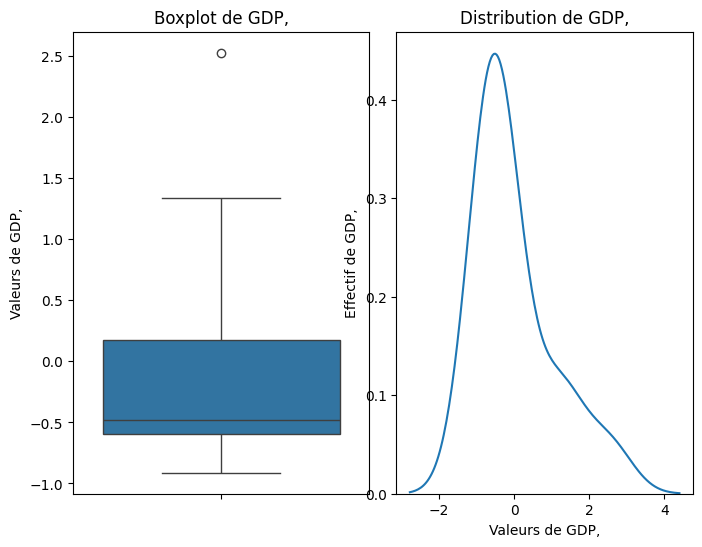

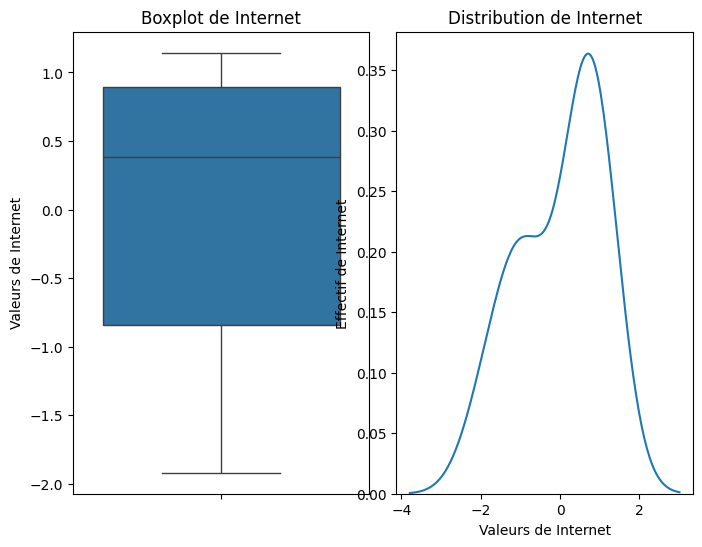

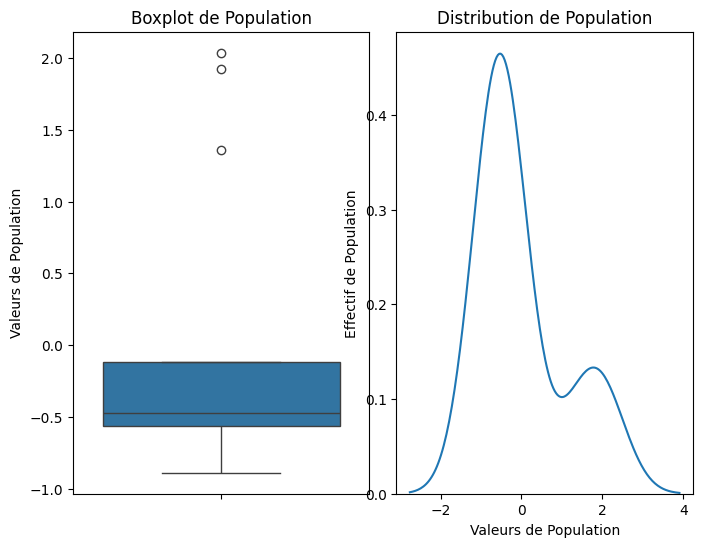

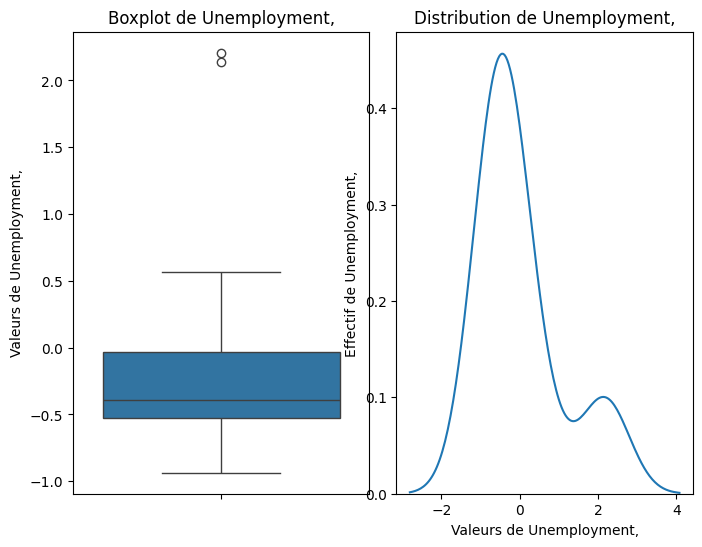

In [137]:
# CREATION DE LA MOSAIQUE
# LA MOSAIQUE PERMET DE FACILEMENT GERER LES POSITIONS DES SUBPLOTS
for col in DF_etude.columns:
    if col not in ['Country Code','Short Name']:
        layout="""
        AABB
        AABB

        """

        fig,axd = plt.subplot_mosaic(layout,figsize=(8,6),dpi=100)
        # CREATION D'UN BOX PLOT EN UTILISANT SEABORN
        sns.boxplot(y=DF_etude[col],ax=axd['A'])
        axd['A'].set_title(f'Boxplot de {col.split(' ')[0]}')
        axd['A'].set_ylabel(f'Valeurs de {col.split(' ')[0]}')

        # CREATION D'UN HISTOGRAMME AVEC COURBE DE DENSITE EN UTILISANT SEABORN

        sns.kdeplot(DF_etude[col],ax=axd['B'])
        axd['B'].set_title(f'Distribution de {col.split(' ')[0]}')
        axd['B'].set_xlabel(f'Valeurs de {col.split(' ')[0]}')
        axd['B'].set_ylabel(f'Effectif de {col.split(' ')[0]}')


        plt.show()

ON VA MAINTENANT CREER UNE HEATMAP DES CORRELATION

In [138]:
#CREATION DE LA MATRICE DE CORRELATION
Mat_corr=DF_etude.drop(['Country Code','Short Name'],axis=1).corr()
Mat_corr

,"GDP, PPP (current international $)",Internet users (per 100 people),Population Cible,"Unemployment, total (% of total labor force)"
"GDP, PPP (current international $)",1.000000,0.237733,0.967369,0.005494
Internet users (per 100 people),0.237733,1.000000,0.152114,-0.714559
Population Cible,0.967369,0.152114,1.000000,0.051544
"Unemployment, total (% of total labor force)",0.005494,-0.714559,0.051544,1.000000


ON VOIT ICI LES CORRELATIONS ENTRE LES DIFFERENTES VARIABLES

1 INDIQUE UNE FORTE CORRELATION POSITIVE (QUAND UNE VARIABLE AUGMENTE L'AUTRE FAIT DE MEME)

-1 INDIQUE UNE FORTE CORRELATION NEGATIVE (QUAND UNE VARIABLE AUGMENTE L'AUTRE DIMINUE)

UTILISONS UNE HEATMAP POUR MIEUX PERCEVOIR LES CORRELATIONS

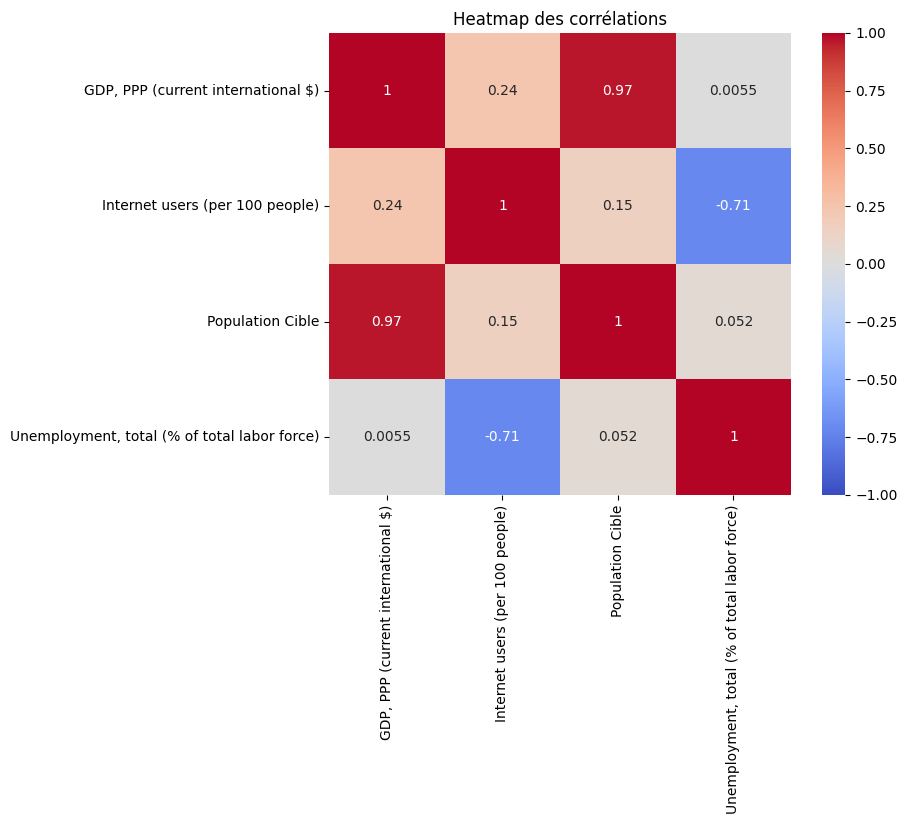

In [139]:
fig,ax = plt.subplots(figsize=(8,6))

heatmap=sns.heatmap(Mat_corr,
                    annot=True, #PERMET D'AFFICHER LES VALEURS DANS LES CASES DE LA HEATMAP
                    cmap='coolwarm', #PALETTE DE COULEUR CHAUD/FROID
                    vmin=-1,vmax=1, #DEFINIT QUE LES VALEURS SERONT ENTRE -1 ET 1 POUR FACILITER LA COLORISATION
                    center=0, # LA PALETTE EST CENTREE SUR 0 LA ENCORE POUR UN SOUCIS DE PRATICITE
                    square=True, #GARANTIE QUE CHAQUE CASE SERA DE FORME CARREE
                    ax=ax)

plt.title('Heatmap des corrélations')
plt.show()

ON CONSTATE UNE FORTE CORRELATION POSITIVE ENTRE POPULATION CIBLE ET PIB

EGALEMENT UNE CORRELATION NEGATIVE IMPORTANTE ENTRE LE TAUX DE CHOMAGE ET LE POURCENTAGE DE PERSONNES DISPOSANT D'UN ACCES INTERNET

In [140]:
import geopandas as gpd

# Charger les données géographiques du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Si vous voulez voir tous les noms uniques
print("\nListe des noms de pays uniques:")
print(sorted(world['name'].unique()))

for pays in DF_etude['Short Name']:
    if pays not in world['name'].unique():
        print(pays)


Liste des noms de pays uniques:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan

MALTE N'EXISTE PAS DANS LA LISTE DES PAYS DE GEOPANDAS

IL FAUT MODIFIER KOREA EN SOUTH KOREA DANS LE DF

In [141]:
DF_etude.iloc[8,1]='South Korea'
DF_etude

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),Population Cible,"Unemployment, total (% of total labor force)"
0,CHE,Switzerland,-0.267165,0.381672,-0.510628,-0.791670
1,CYP,Cyprus,-0.893703,-1.452080,-0.868202,0.563295
2,DNK,Denmark,-0.572343,1.019421,-0.545105,-0.391203
3,ESP,Spain,1.177128,-0.780985,1.357379,2.135054
4,FIN,Finland,-0.623478,0.576788,-0.566924,-0.183441
5,GBR,United Kingdom,2.528098,0.632323,2.037491,-0.394214
6,GRC,Greece,-0.538926,-1.919532,-0.476229,2.207318
7,HUN,Hungary,-0.598168,-0.843771,-0.357045,-0.035901
8,KOR,South Korea,1.335732,0.350857,1.923128,-0.936199
9,MLT,Malta,-0.912227,-0.933177,-0.889312,-0.529710


In [144]:
DF_etude['Score']=DF_etude['GDP, PPP (current international $)']/
+DF_etude['Internet users (per 100 people)']/
+DF_etude['Population Cible']/
-DF_etude['Unemployment, total (% of total labor force)']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15956\3145275703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_etude['Score']=DF_etude['GDP, PPP (current international $)']+DF_etude['Internet users (per 100 people)']+DF_etude['Population Cible']-DF_etude['Unemployment, total (% of total labor force)']


In [145]:
DF_etude

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),Population Cible,"Unemployment, total (% of total labor force)",Score
0,CHE,Switzerland,-0.267165,0.381672,-0.510628,-0.791670,0.395549
1,CYP,Cyprus,-0.893703,-1.452080,-0.868202,0.563295,-3.777279
2,DNK,Denmark,-0.572343,1.019421,-0.545105,-0.391203,0.293176
3,ESP,Spain,1.177128,-0.780985,1.357379,2.135054,-0.381531
4,FIN,Finland,-0.623478,0.576788,-0.566924,-0.183441,-0.430173
5,GBR,United Kingdom,2.528098,0.632323,2.037491,-0.394214,5.592125
6,GRC,Greece,-0.538926,-1.919532,-0.476229,2.207318,-5.142006
7,HUN,Hungary,-0.598168,-0.843771,-0.357045,-0.035901,-1.763083
8,KOR,South Korea,1.335732,0.350857,1.923128,-0.936199,4.545917
9,MLT,Malta,-0.912227,-0.933177,-0.889312,-0.529710,-2.205007


ON VA CREER UNE MAP INTERACTIVE, CARTE CHOROPLETHE (CAD UNE CARTE AVEC DES COULEURS COMME INDICATEURS)

In [154]:
import folium


# Charger les données géographiques du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Fusionner vos données avec le GeoDataFrame du monde
world = world.merge(DF_etude, left_on='name', right_on='Short Name', how='left')

# Créer une carte centrée sur le monde
m = folium.Map(location=[0, 0], zoom_start=2)

# Ajouter la couche choroplèthe seulement pour les pays avec des données
folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['name', 'Score'],
    key_on='feature.properties.name',
    fill_color='viridis',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Score'
).add_to(m)

# Ajouter une couche GeoJson pour tous les pays (pour montrer les frontières)
folium.GeoJson(
    world,
    style_function=lambda feature: {
        'fillColor': 'white' if pd.isna(feature['properties']['Score']) else 'transparent',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9 if pd.isna(feature['properties']['Score']) else 0.1,
    }
).add_to(m)

# Ajouter un contrôle de couche
folium.LayerControl().add_to(m)


In [155]:

# Afficher la carte (dans un notebook Jupyter)
m
